# Playing with filters

## 1. Explore convolution
- load a random image from `scipy.misc`
- apply a simple edge-detection filter
- try convolution with pooling

## 2. More in-depth ideas about filters and convolution
- median, egde finding, blurry, bumpy, ... filters

Source: 
- https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb
- https://lodev.org/cgtutor/filtering.html

In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from scipy import misc
import numpy as np
image = misc.ascent()

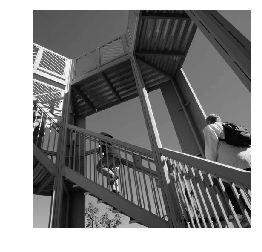

In [67]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image)
plt.show()

In [68]:
filter_to_detect_edges = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1
def convolution(image, f, weight):
    image_copy = np.copy(image)
    for x in range(1, image.shape[0]-1):
        for y in range(1, image.shape[1]-1):
            convolution = 0.0
            convolution = convolution + (image[x - 1, y-1] * f[0][0])
            convolution = convolution + (image[x, y-1] * f[0][1])
            convolution = convolution + (image[x + 1, y-1] * f[0][2])
            convolution = convolution + (image[x-1, y] * f[1][0])
            convolution = convolution + (image[x, y] * f[1][1])
            convolution = convolution + (image[x+1, y] * f[1][2])
            convolution = convolution + (image[x-1, y+1] * f[2][0])
            convolution = convolution + (image[x, y+1] * f[2][1])
            convolution = convolution + (image[x+1, y+1] * f[2][2])
            convolution = convolution * weight
            """
            if convolution<0:
                convolution=0
            if convolution>255:
                convolution=255
            """
            image_copy[x, y] = convolution
    
    return image_copy

transformed_image = convolution(image, filter_to_detect_edges, weight)

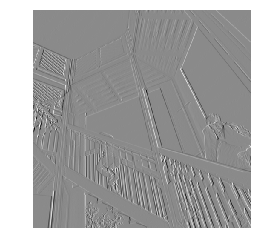

In [69]:
plt.gray()
plt.grid(False)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()

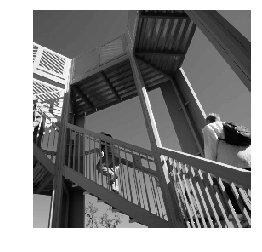

In [70]:
def convolution_with_pooling(image):
    new_x = int(image.shape[0]/2)
    new_y = int(image.shape[1]/2)
    new_image = np.zeros((new_x, new_y))
    image_copy = np.copy(image)
    for x in range(1, image.shape[0]-1):
        for y in range(1, image.shape[1]-1):
            pixels = []
            pixels.append(image_copy[x, y])
            pixels.append(image_copy[x+1, y])
            pixels.append(image_copy[x, y+1])
            pixels.append(image_copy[x+1, y+1])
            new_image[int(x/2),int(y/2)] = max(pixels)
    
    return new_image

transformed_image = convolution_with_pooling(image)
plt.gray()
plt.grid(False)
plt.imshow(transformed_image)
plt.axis('off')
plt.show()

## 2. More in-depth ideas about filters and convolution

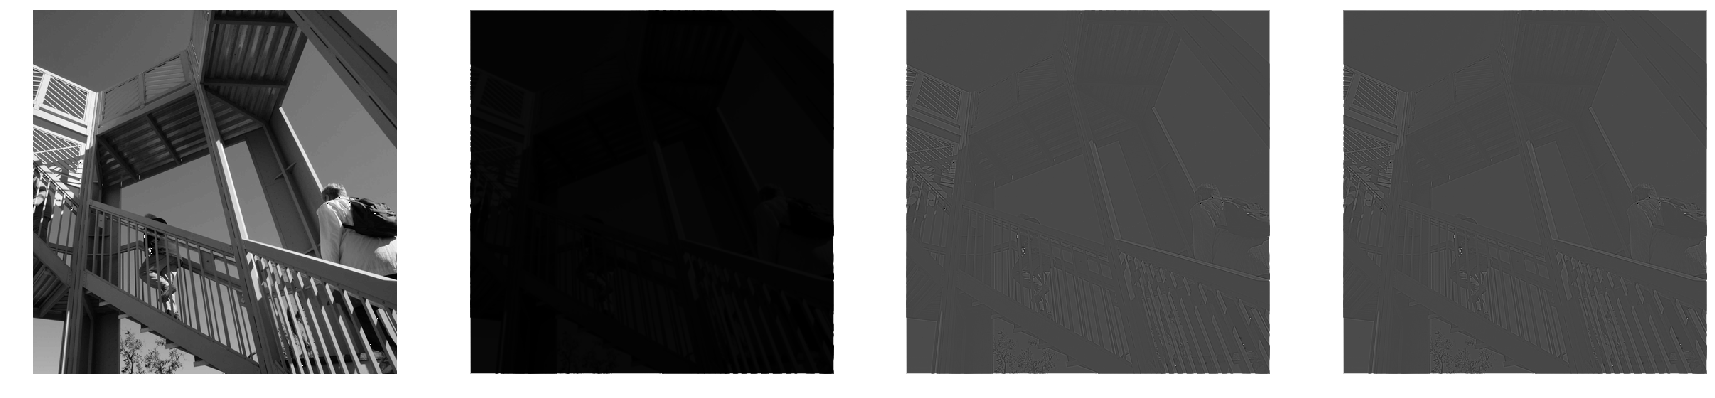

In [71]:
weight = 0.05
soft_blur_filter = [[0, 0.2, 0], [0.2, 0.2, 0.2], [0, 0.2, 0]]
soft_blur = convolution(image, soft_blur_filter, weight)
sharpen_filter = [[-1, -1,-1], [-1, 9, -1], [-1, -1,-1]]
sharpen = convolution(image, sharpen_filter, weight)
edges_filter = [[1, 1, 1], [1, -7, 1], [1, 1, 1]]
edges = convolution(image, sharpen_filter, weight)

fig, ax = plt.subplots(1, 4, figsize=(30,10))

ax[0].grid(False)
ax[0].imshow(image)
ax[0].axis('off')

ax[1].grid(False)
ax[1].imshow(soft_blur)
ax[1].axis('off')

ax[2].grid(False)
ax[2].imshow(sharpen)
ax[2].axis('off')

ax[3].grid(False)
ax[3].imshow(edges)
ax[3].axis('off')

fig.show()

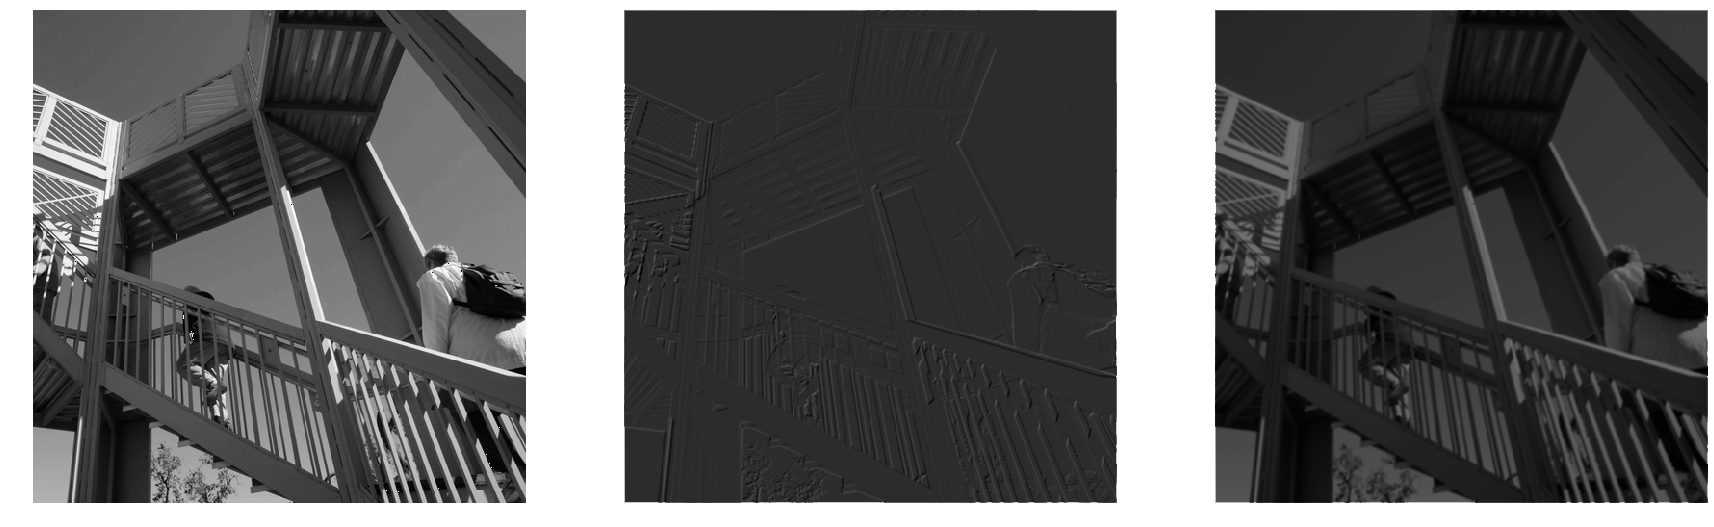

In [72]:
weight = 0.1

bump_map_filter = [[-1, -1,  0], [-1,  0,  1], [0,  1,  1]]
bump_map = convolution(image, bump_map_filter, weight)
median_filter = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
median = convolution(image, median_filter, 0.05)

fig, ax = plt.subplots(1, 3, figsize=(30,10))

ax[0].grid(False)
ax[0].imshow(image)
ax[0].axis('off')

ax[1].grid(False)
ax[1].imshow(bump_map)
ax[1].axis('off')

ax[2].grid(False)
ax[2].imshow(median)
ax[2].axis('off')

fig.show()